In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import dask
import cftime
import random
import glob
import matplotlib.gridspec as gs


In [2]:
from dask.distributed import Client, LocalCluster
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37637,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:39397,Total threads: 2
Dashboard: /proxy/41973/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:37021,


In [19]:
data_dir = "/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/"
outdir_u = "/g/data/e14/sm2435/Exps_ACCESS_initial/VC_u/"
outdir_v = "/g/data/e14/sm2435/Exps_ACCESS_initial/VC_v/"
outdir_om = "/g/data/e14/sm2435/Exps_ACCESS_initial/VC_om/"


#Now loop data to get the variable out of the files
for i in range(951,953,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cy286a.pm{formatted_i}*"
    DS = xr.open_mfdataset(files, use_cftime=True)
    u = DS.fld_s30i201
    v = DS.fld_s30i202
    om = DS.fld_s30i208
    u = u.drop(['height', 'height_0'])
    v = v.drop(['height', 'height_0'])
    om = om.drop(['height', 'height_0'])
    #u.to_netcdf(outdir_u+f"VC_u{formatted_i}.nc")
    #v.to_netcdf(outdir_v+f"VC_v{formatted_i}.nc")
    #om.to_netcdf(outdir_om+f"VC_om{formatted_i}.nc")
    print("saved", i)


saved 951
saved 952


In [18]:
DS

<xarray.Dataset>
Dimensions:                   (time: 12, model_theta_level_number: 85,
                               lat: 144, lon: 192, bnds: 2,
                               model_rho_level_number: 85, pseudo_level: 5,
                               pseudo_level_0: 6, lon_u: 192, lat_v: 145,
                               pseudo_level_1: 17, pseudo_level_2: 13,
                               depth: 6, pressure: 19)
Coordinates: (12/20)
  * time                      (time) object 0952-01-16 12:00:00 ... 0952-12-1...
  * model_theta_level_number  (model_theta_level_number) int32 1 2 3 ... 84 85
  * lat                       (lat) float64 -89.38 -88.12 -86.88 ... 88.12 89.38
  * lon                       (lon) float64 0.9375 2.812 4.688 ... 357.2 359.1
    theta_level_height        (model_theta_level_number) float64 dask.array<chunksize=(85,), meta=np.ndarray>
    sigma_theta               (model_theta_level_number) float64 dask.array<chunksize=(85,), meta=np.ndarray>
    ...                        ...
  * lat_v                     (lat_v) float64 -90.0 -88.75 -87.5 ... 88.75 90.0
    height_0                  float64 1.5
  * pseudo_level_1            (pseudo_level_1) int32 1 2 3 4 5 ... 14 15 16 17
  * pseudo_level_2            (pseudo_level_2) int32 1 2 3 4 5 ... 9 10 11 12 13
  * depth                     (depth) float64 0.011 0.051 0.157 ... 1.185 3.164
  * pressure                  (pressure) float64 1e+05 9.25e+04 ... 500.0 100.0
Dimensions without coordinates: bnds
Data variables: (12/270)
    fld_s00i004               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 85, 144, 192), meta=np.ndarray>
    latitude_longitude        (time) int32 -2147483647 ... -2147483647
    time_bnds                 (time, bnds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds                  (time, lat, bnds) float64 dask.array<chunksize=(1, 144, 2), meta=np.ndarray>
    lon_bnds                  (time, lon, bnds) float64 dask.array<chunksize=(1, 192, 2), meta=np.ndarray>
    theta_level_height_bnds   (time, model_theta_level_number, bnds) float64 dask.array<chunksize=(1, 85, 2), meta=np.ndarray>
    ...                        ...
    fld_s38i928               (time, lat, lon) float32 dask.array<chunksize=(1, 144, 192), meta=np.ndarray>
    fld_s38i929               (time, lat, lon) float32 dask.array<chunksize=(1, 144, 192), meta=np.ndarray>
    fld_s38i930               (time, lat, lon) float32 dask.array<chunksize=(1, 144, 192), meta=np.ndarray>
    fld_s38i931               (time, lat, lon) float32 dask.array<chunksize=(1, 144, 192), meta=np.ndarray>
    fld_s38i932               (time, lat, lon) float32 dask.array<chunksize=(1, 144, 192), meta=np.ndarray>
    fld_s50i063               (time, model_theta_level_number, lat, lon) float32 dask.array<chunksize=(1, 85, 144, 192), meta=np.ndarray>
Attributes:
    history:      File /scratch/e14/sm2435/archive//cy286/history/atm/cy286a....
    Conventions:  CF-1.6
    source:       Data from Met Office Unified Model
    um_version:   10.6

In [12]:
test = xr.open_mfdataset("/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0960*_mon.nc",  use_cftime = True,  chunks = {"time":12, "pressure": 2})

In [16]:
test.fld_s30i201

<xarray.DataArray 'fld_s30i201' (time: 12, pressure: 19, lat_v: 145, lon_u: 192)>
dask.array<concatenate, shape=(12, 19, 145, 192), dtype=float32, chunksize=(1, 2, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0960-01-16 12:00:00 ... 0960-12-16 12:00:00
  * lon_u     (lon_u) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height    float64 10.0
  * lat_v     (lat_v) float64 -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
    height_0  float64 1.5
  * pressure  (pressure) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Attributes:
    standard_name:    eastward_wind
    long_name:        U COMPNT OF WIND ON P LEV/UV GRID
    units:            m s-1
    um_stash_source:  m01s30i201
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

In [15]:
test.fld_s30i208

<xarray.DataArray 'fld_s30i208' (time: 12, pressure: 19, lat_v: 145, lon_u: 192)>
dask.array<concatenate, shape=(12, 19, 145, 192), dtype=float32, chunksize=(1, 2, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0960-01-16 12:00:00 ... 0960-12-16 12:00:00
  * lon_u     (lon_u) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height    float64 10.0
  * lat_v     (lat_v) float64 -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
    height_0  float64 1.5
  * pressure  (pressure) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Attributes:
    standard_name:    lagrangian_tendency_of_air_pressure
    long_name:        OMEGA ON P LEV/UV GRID
    units:            Pa s-1
    um_stash_source:  m01s30i208
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

In [11]:
data_dir = "/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/VC_u/"

#Now loop data to get the variable out of the files
for i in range(951,962,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cy286a.pm{formatted_i}*"
    print(files)
    test = xr.open_mfdataset(files, use_cftime=True, chunks= {"time":12, "pressure":3}).fld_s30i201


/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0951*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0952*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0953*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0954*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0955*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0956*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0957*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0958*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0959*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0960*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0961*


In [9]:
test.drop(['height', 'height_0'])

<xarray.DataArray 'fld_s30i201' (time: 12, pressure: 19, lat_v: 145, lon_u: 192)>
dask.array<concatenate, shape=(12, 19, 145, 192), dtype=float32, chunksize=(1, 2, 145, 192), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0951-01-16 12:00:00 ... 0951-12-16 12:00:00
  * lon_u     (lon_u) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat_v     (lat_v) float64 -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * pressure  (pressure) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Attributes:
    standard_name:    eastward_wind
    long_name:        U COMPNT OF WIND ON P LEV/UV GRID
    units:            m s-1
    um_stash_source:  m01s30i201
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

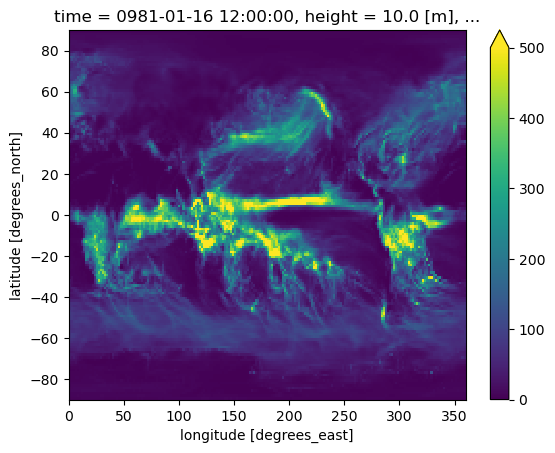

In [14]:
(86400*30*(test.fld_s05i214[0]+test.fld_s05i215[0])).plot(vmin = 0, vmax = 500)

In [28]:
test.fld_s03i209

<xarray.DataArray 'fld_s03i209' (time: 1, lat: 144, lon_u: 192)>
[27648 values with dtype=float32]
Coordinates:
  * time      (time) object 0981-01-16 12:00:00
  * lat       (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon_u     (lon_u) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height    float64 ...
    height_0  float64 ...
Attributes:
    standard_name:    eastward_wind
    long_name:        10 METRE WIND U-COMP
    units:            m s-1
    um_stash_source:  m01s03i209
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

In [12]:
data_dir = "/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/"

In [11]:
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/VC_psl/"

In [13]:
for i in range(951,1001,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cy286a.pm{formatted_i}*"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, chunks= {"time":12}).fld_s00i409
    rain.to_netcdf(outdir+f"VC_pr{formatted_i}.nc")

/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0951*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0952*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0953*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0954*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0955*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0956*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0957*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0958*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0959*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0960*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0961*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0962*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0963*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/netCDF/cy286a.pm0964*
/scratch/e14/sm2435/PACE_OC/cy286/history/atm/ne

In [14]:
data_dir = "/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/OC_psl/"
for i in range(981,1001,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cw323a.pm{formatted_i}*"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, parallel=True).fld_s00i409
    rain.to_netcdf(outdir+f"OC_pr{formatted_i}.nc")

/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0981*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0982*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0983*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0984*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0985*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0986*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0987*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0988*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0989*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0990*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0991*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0992*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0993*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0994*
/scratch/e14/sm2435/PACE_OC/cw323/history/atm/ne

In [15]:
data_dir = "/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/OC_psl/"
for i in range(951,981,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cw323a.pm{formatted_i}*"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, parallel=True).fld_s00i409
    rain.to_netcdf(outdir+f"OC_pr{formatted_i}.nc")

/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0951*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0952*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0953*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0954*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0955*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0956*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0957*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0958*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0959*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0960*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0961*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0962*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0963*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0964*
/g/data/e14/sm2435/PACE_OC/cw323/history/atm/netCDF/cw323a.pm0

In [5]:
data_dir = "/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/"
#cm000a.pm0951_mon.nc"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/ctrl_psl/"
for i in range(951,1152,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cm000a.pm{formatted_i}_mon.nc"
    print(files)
    rain = xr.open_dataset(files, use_cftime=True, chunks= {"time":12}).fld_s00i409
    rain.to_netcdf(outdir+f"ctrl_pr{formatted_i}.nc")

/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0951_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0952_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0953_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0954_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0955_mon.nc


2023-09-11 14:31:29,603 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0956_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0957_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0958_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0959_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0960_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0961_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0962_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0963_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0964_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0965_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0966_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:31:41,267 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0971_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0972_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0973_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0974_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0975_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0976_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0977_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0978_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0979_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0980_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0981_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:31:53,309 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0985_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0986_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0987_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0988_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0989_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0990_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0991_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0992_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0993_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0994_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm0995_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:32:05,422 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1001_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1002_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1003_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1004_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1005_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1006_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1007_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1008_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1009_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1010_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1011_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:32:16,973 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1016_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1017_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1018_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1019_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1020_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1021_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1022_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1023_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1024_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1025_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1026_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:32:29,240 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1031_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1032_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1033_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1034_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1035_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1036_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1037_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1038_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1039_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1040_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1041_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:32:41,131 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1046_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1047_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1048_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1049_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1050_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1051_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1052_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1053_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1054_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1055_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1056_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:32:53,370 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1061_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1062_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1063_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1064_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1065_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1066_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1067_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1068_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1069_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1070_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1071_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:33:05,473 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1076_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1077_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1078_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1079_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1080_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1081_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1082_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1083_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1084_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1085_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1086_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:33:17,048 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1091_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1092_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1093_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1094_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1095_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1096_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1097_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1098_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1099_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1100_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1101_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:33:29,209 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1106_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1107_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1108_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1109_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1110_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1111_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1112_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1113_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1114_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1115_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1116_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:33:41,230 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1121_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1122_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1123_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1124_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1125_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1126_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1127_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1128_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1129_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1130_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1131_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:33:52,630 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1135_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1136_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1137_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1138_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1139_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1140_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1141_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1142_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1143_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1144_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1145_mon.nc
/g/data/hh5/tmp/zg0866/cm000_APP

2023-09-11 14:34:05,586 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1151_mon.nc


FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/hh5/tmp/zg0866/cm000_APP4_archive/cm000/history/atm/netCDF/cm000a.pm1151_mon.nc'

In [4]:
data_dir = "/scratch/w97/zg0866/cs947_raw/history/atm/"
#cm000a.pm0951_mon.nc"
outdir = "/g/data/e14/sm2435/Exps_ACCESS_initial/MC_psl/"
for i in range(951,1103,1):
    formatted_i = str(i).zfill(4)
    files = data_dir + f"cs947a.pm{formatted_i}*.nc"
    print(files)
    rain = xr.open_mfdataset(files, use_cftime=True, parallel=True, chunks= {"time":12}).fld_s00i409
    rain.to_netcdf(outdir+f"MC_pr{formatted_i}.nc")

/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0951*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0952*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0953*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0954*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0955*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0956*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0957*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0958*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0959*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0960*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0961*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0962*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0963*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0964*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0965*.nc
/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0966*.nc
/scratch/w97/zg0866/cs947_raw/history/at

2023-09-11 13:53:07,881 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0998*.nc


2023-09-11 13:53:28,993 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:53:31,401 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm0999*.nc


2023-09-11 13:54:01,557 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1000*.nc


2023-09-11 13:54:23,104 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:54:23,637 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1001*.nc


2023-09-11 13:54:44,991 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1002*.nc


2023-09-11 13:55:13,184 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:55:13,750 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1003*.nc


2023-09-11 13:55:36,610 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:55:48,488 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1004*.nc


2023-09-11 13:55:58,546 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1005*.nc


2023-09-11 13:56:19,875 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:56:24,896 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1006*.nc


2023-09-11 13:56:45,395 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1007*.nc


2023-09-11 13:57:13,125 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 13:57:13,726 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1008*.nc


2023-09-11 13:57:34,877 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1009*.nc


2023-09-11 13:57:53,399 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 13:57:57,887 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:58:02,989 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1010*.nc


2023-09-11 13:58:23,748 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:58:24,346 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1011*.nc


2023-09-11 13:58:47,383 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1012*.nc


2023-09-11 13:59:09,340 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:59:09,885 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1013*.nc


2023-09-11 13:59:30,210 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1014*.nc


2023-09-11 13:59:52,263 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 13:59:52,867 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1015*.nc


2023-09-11 14:00:12,804 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 14:00:25,862 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1016*.nc


2023-09-11 14:00:34,872 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1017*.nc


2023-09-11 14:00:56,528 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1018*.nc


2023-09-11 14:01:22,065 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 14:01:22,673 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1019*.nc


2023-09-11 14:01:44,266 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 14:01:56,765 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1020*.nc


2023-09-11 14:02:06,959 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1021*.nc


2023-09-11 14:02:29,738 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1022*.nc


2023-09-11 14:02:50,674 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:02:51,263 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1023*.nc


2023-09-11 14:03:13,179 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:03:26,597 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1024*.nc


2023-09-11 14:03:34,579 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1025*.nc


2023-09-11 14:03:53,833 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 14:03:54,491 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1026*.nc


2023-09-11 14:04:15,874 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1027*.nc


2023-09-11 14:04:38,684 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:04:51,612 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1028*.nc


2023-09-11 14:05:00,964 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1029*.nc


2023-09-11 14:05:22,775 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1030*.nc


2023-09-11 14:05:46,879 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:05:47,501 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1031*.nc


2023-09-11 14:06:08,219 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1032*.nc


2023-09-11 14:06:30,369 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:06:30,992 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1033*.nc


2023-09-11 14:06:52,464 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1034*.nc


2023-09-11 14:07:13,360 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:07:14,024 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1035*.nc


2023-09-11 14:07:33,974 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1036*.nc


2023-09-11 14:07:55,765 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:08:02,999 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1037*.nc


2023-09-11 14:08:18,735 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1038*.nc


2023-09-11 14:08:38,497 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1039*.nc


2023-09-11 14:08:59,077 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:08:59,747 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1040*.nc


2023-09-11 14:09:20,038 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1041*.nc


2023-09-11 14:09:43,243 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-09-11 14:09:43,875 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1042*.nc


2023-09-11 14:10:04,412 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1043*.nc


2023-09-11 14:10:25,416 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 14:10:26,077 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1044*.nc


2023-09-11 14:10:50,390 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1045*.nc


2023-09-11 14:11:10,981 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1046*.nc


2023-09-11 14:11:24,806 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 14:11:31,999 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1047*.nc


2023-09-11 14:11:53,390 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1048*.nc


2023-09-11 14:12:13,104 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-09-11 14:12:13,729 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1049*.nc


2023-09-11 14:12:41,282 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1050*.nc


2023-09-11 14:13:01,613 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:13:02,243 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1051*.nc


2023-09-11 14:13:26,373 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1052*.nc


2023-09-11 14:13:48,261 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:13:48,955 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1053*.nc


2023-09-11 14:14:08,307 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1054*.nc


2023-09-11 14:14:28,140 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:14:32,806 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1055*.nc


2023-09-11 14:14:49,181 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1056*.nc


2023-09-11 14:15:09,280 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1057*.nc


2023-09-11 14:15:28,773 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:15:29,435 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1058*.nc


2023-09-11 14:15:51,144 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1059*.nc


2023-09-11 14:16:11,312 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:16:11,942 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1060*.nc


2023-09-11 14:16:32,476 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1061*.nc


2023-09-11 14:16:51,389 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:16:52,033 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1062*.nc


2023-09-11 14:17:11,399 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1063*.nc


2023-09-11 14:17:31,771 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1064*.nc


2023-09-11 14:17:51,632 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:17:52,252 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1065*.nc


2023-09-11 14:18:12,694 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1066*.nc


2023-09-11 14:18:32,012 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:18:32,636 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1067*.nc


2023-09-11 14:18:51,634 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1068*.nc


2023-09-11 14:19:10,875 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-09-11 14:19:11,504 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1069*.nc


2023-09-11 14:19:30,552 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1070*.nc


2023-09-11 14:19:50,129 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1071*.nc


2023-09-11 14:20:15,031 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-09-11 14:20:15,669 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1072*.nc


2023-09-11 14:20:35,616 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1073*.nc


2023-09-11 14:20:54,927 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-09-11 14:20:55,558 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1074*.nc


2023-09-11 14:21:16,607 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1075*.nc


2023-09-11 14:21:41,018 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-09-11 14:21:52,101 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1076*.nc


2023-09-11 14:22:00,943 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1077*.nc


2023-09-11 14:22:20,212 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1078*.nc


2023-09-11 14:22:39,618 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:22:40,265 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1079*.nc


2023-09-11 14:22:59,875 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1080*.nc


2023-09-11 14:23:19,826 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1081*.nc


2023-09-11 14:23:39,905 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:23:40,543 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1082*.nc


2023-09-11 14:24:01,161 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1083*.nc


2023-09-11 14:24:20,923 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:24:21,584 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1084*.nc


2023-09-11 14:24:47,594 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1085*.nc


2023-09-11 14:25:07,573 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:25:20,894 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1086*.nc


2023-09-11 14:25:28,283 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1087*.nc


2023-09-11 14:25:51,438 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1088*.nc


2023-09-11 14:26:11,652 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:26:12,339 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1089*.nc


2023-09-11 14:26:32,940 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1090*.nc


2023-09-11 14:26:54,241 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:26:54,989 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1091*.nc


2023-09-11 14:27:22,762 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1092*.nc


2023-09-11 14:27:42,214 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1093*.nc


2023-09-11 14:28:03,233 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:28:03,885 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1094*.nc


2023-09-11 14:28:23,959 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1095*.nc


2023-09-11 14:28:46,897 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1096*.nc


2023-09-11 14:29:07,091 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:29:07,726 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1097*.nc


2023-09-11 14:29:27,585 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1098*.nc


2023-09-11 14:29:48,218 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:29:49,081 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1099*.nc


2023-09-11 14:30:09,522 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1100*.nc


2023-09-11 14:30:31,061 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1101*.nc


2023-09-11 14:30:52,513 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-09-11 14:30:53,153 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


/scratch/w97/zg0866/cs947_raw/history/atm/cs947a.pm1102*.nc


2023-09-11 14:31:12,393 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
